# 1.Keras Image Augmentation API

`ImageDataGenerator` class: defines the configuration for image data preparation and augmentation. 

- Feature-wise standardization
- ZCA whitening
- Random rotation, shifts, shear and flips
- Dimension reordering.
- Save augmented images to disk

```
datagen = ImageDataGenerator()


# fit it on training dataset
datagen.fit(train)

# Configure batch size for the ImageDataGenerator
X_batch, y_batch = datagen.flow(train, train, batch_size=32)

# Fit a model using the ImageDataGenerator
fit_generator(datagen, sample_per_epoch=len(train), nb_epoch=100)
```

# 2.Point of Comparison for Image Augmentation

Using Theano backend.


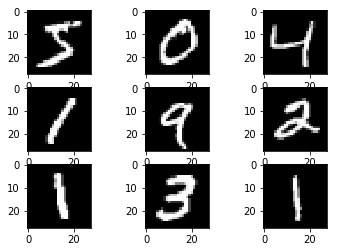

In [1]:
# Plot of images as baseline for comparison
from keras.datasets import mnist

import matplotlib.pyplot as plt

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# create a grid of 3x3 images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

# 3.Feature Standardization

D:\ProgramData\Anaconda2\lib\site-packages\keras\preprocessing\image.py:653: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (60000L, 1L, 28L, 28L) (1 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


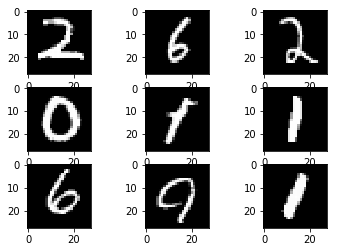

In [2]:
# Srandardize images across the dataset, mean=0, stdev=1
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

# Convert
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# Fit parameters from data
datagen.fit(X_train)
# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
        
    # show the plot
    plt.show()
    break

为什么两次显示图片不一样, 也没有看到是随机采样的呀.!

## Error 

```
ValueError                                Traceback (most recent call last)
<ipython-input-8-0f19cb93cdd3> in <module>()
     21 datagen.fit(X_train)
     22 # Configure batch size and retrieve one batch of images
---> 23 for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
     24     # create a grid of 3x3 images
     25     for i in range(0, 9):

D:\ProgramData\Anaconda2\lib\site-packages\keras\preprocessing\image.pyc in flow(self, x, y, batch_size, shuffle, seed, save_to_dir, save_prefix, save_format)
    459             save_to_dir=save_to_dir,
    460             save_prefix=save_prefix,
--> 461             save_format=save_format)
    462 
    463     def flow_from_directory(self, directory,

D:\ProgramData\Anaconda2\lib\site-packages\keras\preprocessing\image.pyc in __init__(self, x, y, image_data_generator, batch_size, shuffle, seed, data_format, save_to_dir, save_prefix, save_format)
    785                              'either 1, 3 or 4 channels on axis ' + str(channels_axis) + '. '
    786                              'However, it was passed an array with shape ' + str(self.x.shape) +
--> 787                              ' (' + str(self.x.shape[channels_axis]) + ' channels).')
    788         if y is not None:
    789             self.y = np.asarray(y)

ValueError: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000L, 1L, 28L, 28L) (28 channels).
```

## 查阅 

https://stackoverflow.com/questions/45467720/imagedatagenerator-flow-numpyarrayiterator-is-set-to-use-the-data-format-conven

修改: keras.json 为

```
{
    "epsilon": 1e-07, 
    "floatx": "float32", 
    "image_data_format": "channels_first", 
    "backend": "theano"
}
```

之前

`"image_data_format": "channels_first", ` 是 

`"image_data_format": "channels_last", `

## 解决

修改之后就成功了. 

方法:

- google search 好啊
- stackoverflow 好啊

# 4 ZCA whitening

In [3]:
# ZCA
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(type(X_train))

<type 'numpy.ndarray'>


In [5]:
X_train.ndim

3

In [6]:
X_train.shape

(60000L, 28L, 28L)

In [8]:
y_train.shape

(60000L,)

In [7]:
# reshape
# Pixel in case of graysacle data, the channels axis should have value 1
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)

# convert
X_train = X_train.astype("float32")

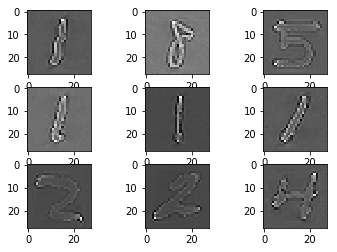

In [9]:
# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

# 5. Random Rotations

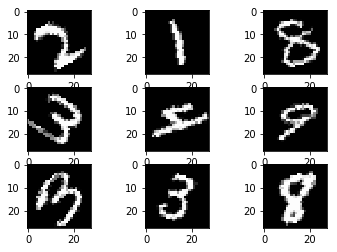

In [10]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

# load_data 
(X_train, y_train),(X_test, y_test) = mnist.load_data()
# reshape
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
# convert
X_train = X_train.astype("float32")

# define data preparation
datagen = ImageDataGenerator(rotation_range=90)

# fit
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap("gray"))
    
    plt.show()
    break

# 6.random shifts

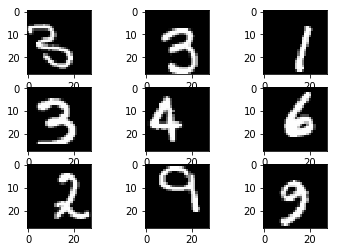

In [12]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

# load_data 
(X_train, y_train),(X_test, y_test) = mnist.load_data()
# reshape
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
# convert
X_train = X_train.astype("float32")

# data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)

datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap("gray"))
    
    plt.show()
    break

# 7.random flips

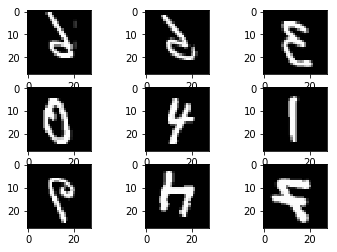

In [13]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

# load_data 
(X_train, y_train),(X_test, y_test) = mnist.load_data()
# reshape
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
# convert
X_train = X_train.astype("float32")

# data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap("gray"))
    
    plt.show()
    break

# 8.Saving Augmented Image to File

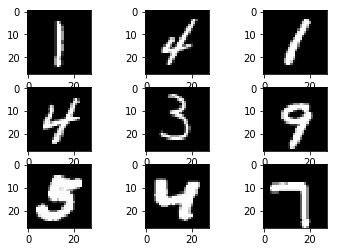

In [14]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

import os

from keras import backend as K
K.set_image_dim_ordering('th')

# load_data 
(X_train, y_train),(X_test, y_test) = mnist.load_data()
# Reshape [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

# Convert
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Define data preparation
datagen = ImageDataGenerator()
# Fit parameters from data
datagen.fit(X_train)

# configre
os.makedirs("images")
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images',
                                    save_prefix='aug', save_format='png'):
    for i in range(9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap("gray"))
        
    plt.show()
    break

# sum

- `ImageDataGenerator` API
- Feature-wise pixel standardization
- ZCA whitening transform.
- Random rotation, shifts and flips of images.
- How to save transformed images to file for later reuse.